In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import itertools

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(xtrain, ytrain),(xtest,ytest) = mnist.load_data()

xtrain = xtrain / 255.0
xtest = xtest / 255.0
print("x train shape",xtrain.shape)

x train shape (60000, 28, 28)


In [6]:
# Model building
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input size as seen in the shape
    tf.keras.layers.Dense(128,activation='relu'), # relu is used by many papers, so testing with it first can escalate finding the optimal parameters
    tf.keras.layers.Dropout(0.2), # Prunning for less overfitting
    tf.keras.layers.Dense(10,activation='softmax') # 10 numbers so 10 neurons
])

In [8]:
# Model compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
training_history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2902 - accuracy: 0.9165 - val_loss: 0.1348 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1376 - accuracy: 0.9589 - val_loss: 0.0962 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.0789 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0709 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.0708 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0655 - val_accuracy:

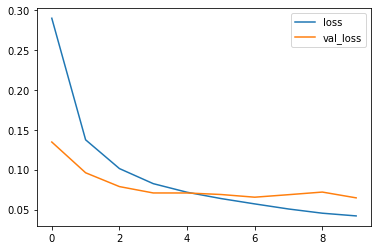

In [10]:
plt.plot(training_history.history['loss'],label = 'loss')
plt.plot(training_history.history['val_loss'],label='val_loss')
plt.legend()

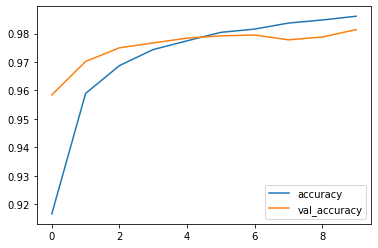

In [11]:
plt.plot(training_history.history['accuracy'],label = 'accuracy')
plt.plot(training_history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [12]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 715us/step - loss: 0.0647 - accuracy: 0.9814


[0.06471303850412369, 0.9814000129699707]

Confusion matrix, without normalization


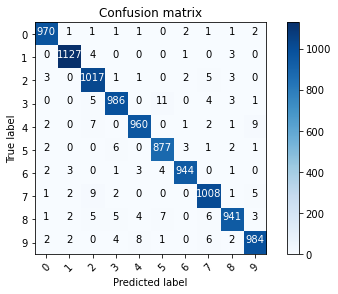

In [14]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  #print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest,p_test)
plot_confusion_matrix(cm,list(range(10)))

[1]


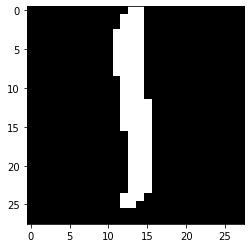

In [22]:
import numpy as np
from PIL import Image
from PIL import ImageFilter
from IPython.display import clear_output


from PIL import ImageTk, Image, ImageDraw
import PIL
import PIL.Image
from tkinter import *

width = 500  # canvas width
height = 500 # canvas height
center = height//2
white = (0, 0, 0) # canvas back

def save():
    clear_output(wait=True)
    global output_image
    # save image to hard drive
    img = output_image.resize((28, 28)).convert('L')
#     print(output_image1)
#     output_image1.save(filename)
    #img = output_image#Image.open(list(upload)[0])
#     im1 = img.filter(ImageFilter.BLUR)
#     im2 = img.filter(ImageFilter.MinFilter(3))
#     im3 = img.filter(ImageFilter.MinFilter)
    img = np.array(img)

    #print(img.shape)
    img = img/255.0
    img[img != 0.0] = 1.0;
    array = np.array([img])
    #print(array.shape)
    ppred = model.predict(array).argmax(axis=1)
    print(ppred)
    plt.imshow(img,cmap='gray')
    plt.show()
#     plt.figure()
#     plt.imshow(img,label=ppred)
#     print(plt.imshow(img,cmap='gray'))


    canvas.delete("all")
    pixels = output_image.load()
    for i in range(output_image.size[0]): # for every pixel:
        for j in range(output_image.size[1]):
            if pixels[i,j] != (0, 0, 0):
                # change to black if not red
                pixels[i,j] = (0, 0 ,0)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="white",width=50)
    draw.line([x1, y1, x2, y2],fill="white",width=50)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="Predict",command=save)
button.pack()



master.mainloop()